In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from src.data_loader import load_dataframe

In [2]:
attributes = ['danceability', 'energy', 'speechiness', 'valence', 'tempo']
n_att = len(attributes)
rc_count = int(np.ceil(np.sqrt(n_att)))
genres = ['pop', 'rap', 'rock', 'latin', 'r&b', 'edm']

In [3]:
df = load_dataframe()
df = df.drop(columns=['is_hit'])

In [4]:
df.head()

,track_name,track_artist,track_popularity,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,speechiness,valence,tempo
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2019-06-14,Pop Remix,pop,dance pop,0.748,0.916,0.0583,0.518,122.036
1,Memories - Dillon Francis Remix,Maroon 5,67,2019-12-13,Pop Remix,pop,dance pop,0.726,0.815,0.0373,0.693,99.972
2,All the Time - Don Diablo Remix,Zara Larsson,70,2019-07-05,Pop Remix,pop,dance pop,0.675,0.931,0.0742,0.613,124.008
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,2019-07-19,Pop Remix,pop,dance pop,0.718,0.930,0.1020,0.277,121.956
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,2019-03-05,Pop Remix,pop,dance pop,0.650,0.833,0.0359,0.725,123.976


In [5]:
df.corr(numeric_only=True)

,track_popularity,danceability,energy,speechiness,valence,tempo
track_popularity,1.000000,0.046574,-0.103511,0.005440,0.022594,0.004322
danceability,0.046574,1.000000,-0.081427,0.183558,0.333751,-0.184640
energy,-0.103511,-0.081427,1.000000,-0.029030,0.149662,0.151658
speechiness,0.005440,0.183558,-0.029030,1.000000,0.064824,0.032755
valence,0.022594,0.333751,0.149662,0.064824,1.000000,-0.025046
tempo,0.004322,-0.184640,0.151658,0.032755,-0.025046,1.000000


In [6]:
df[df['playlist_genre'] == 'rap'].corr(numeric_only=True)

,track_popularity,danceability,energy,speechiness,valence,tempo
track_popularity,1.000000,0.134635,-0.120532,-0.078645,-0.027399,0.049321
danceability,0.134635,1.000000,-0.146614,0.017634,0.254167,-0.097734
energy,-0.120532,-0.146614,1.000000,0.063230,0.203030,0.092022
speechiness,-0.078645,0.017634,0.063230,1.000000,0.171212,0.017155
valence,-0.027399,0.254167,0.203030,0.171212,1.000000,-0.017284
tempo,0.049321,-0.097734,0.092022,0.017155,-0.017284,1.000000


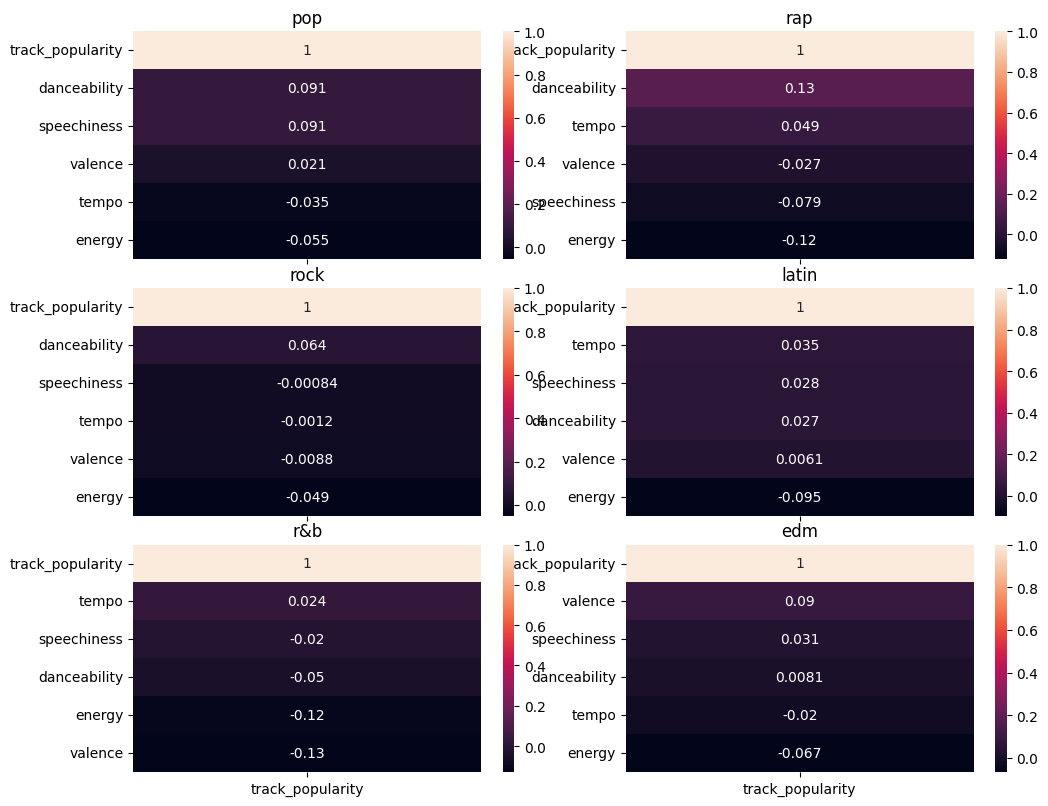

In [7]:
f, ax = plt.subplots(3, 2, figsize=(10, 8), sharex=True)

f.tight_layout()

for i, genre in enumerate(genres):
    corr = df[df['playlist_genre'] == genre].corr(numeric_only=True)
    sns.heatmap(corr[['track_popularity']].sort_values(by='track_popularity', ascending=False), annot=True, ax=ax.flat[i])
    ax.flat[i].set_title(genre)

Acousticness probably doesnt matter since its only a confidence value of whether a song is acoustic or not and not "how acoustic" a song is

Rap: 
- Higher danceability leads to higher popularity
- Lower energy leads to higher popularity

R&B:
- Lower energy leads to higher popularity
- Lower valence leads to higher popularity

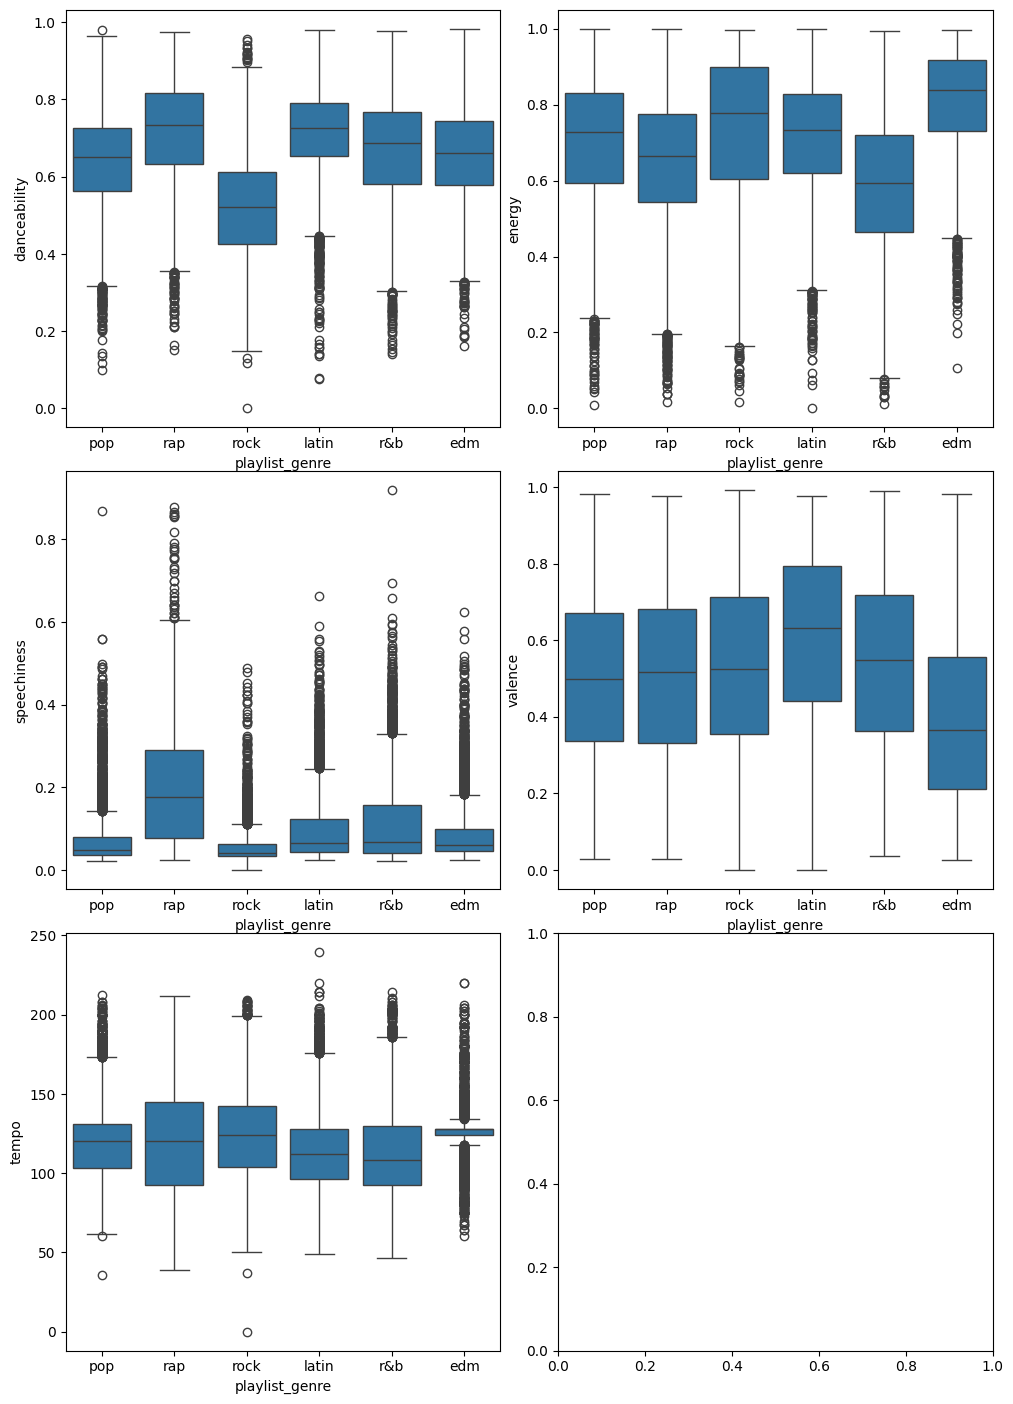

In [8]:
f, ax = plt.subplots(3, 2, figsize=(10, 14))

f.tight_layout()

for i, attr in enumerate(attributes):
    sns.boxplot(data=df, ax=ax.flat[i], x="playlist_genre", y=attr)
    

Pop: 
- Doesnt stand out

Rap: 
- Highest danceability
- Lower energy than most
- Highest speechiness
- Most varied tempo

Rock:
- Lowest danceability by far
- High energy
- Generally low speechiness

Latin:
- High danceability
- Highest valence -> Feel good music

R&B:
- Lowest energy
- Pretty varied speechiness

EDM:
- Highest energy
- Lowest valence -> ???

In [9]:
df.groupby('playlist_genre').mean(numeric_only=True)

,track_popularity,danceability,energy,speechiness,valence,tempo
playlist_genre,,,,,,
edm,30.678286,0.657639,0.809604,0.087940,0.397491,126.328088
latin,41.449710,0.711021,0.710417,0.100461,0.607361,118.527793
pop,45.905300,0.637698,0.701031,0.074161,0.502176,120.962740
r&b,35.929396,0.667475,0.588932,0.115526,0.537936,113.916866
rap,41.846054,0.716045,0.649767,0.197394,0.505213,120.584885
rock,39.694309,0.518519,0.733067,0.057944,0.532560,125.039452


In [10]:
df["pop_bin"] = pd.cut(df["track_popularity"], bins=[0, 40, 70, 100], labels=["Low", "Medium", "High"])

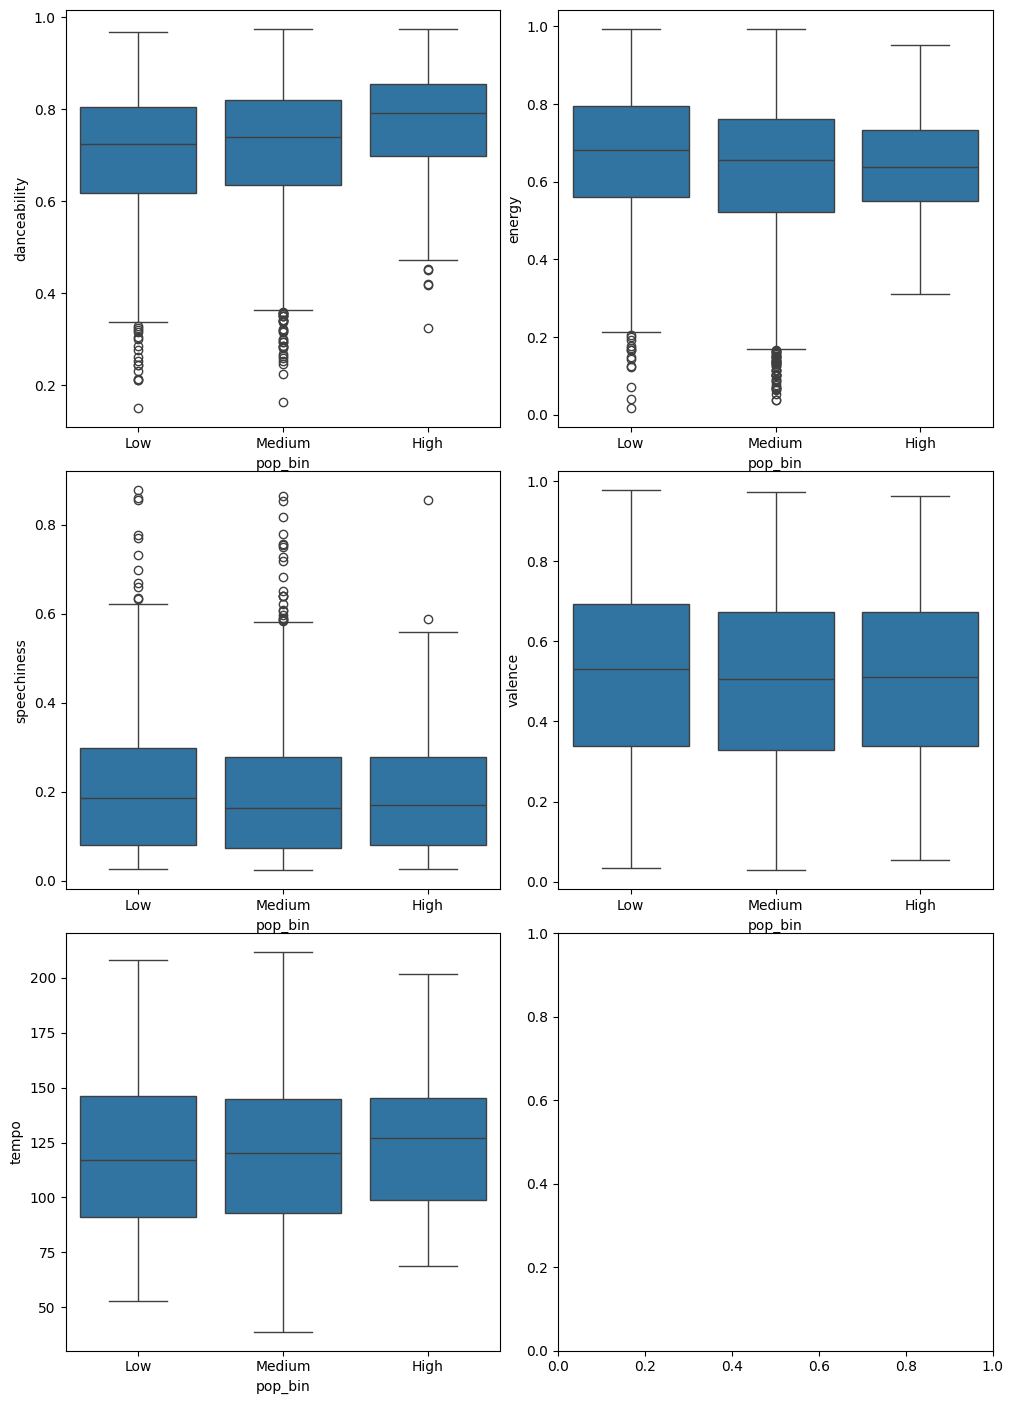

In [11]:
f, ax = plt.subplots(3, 2, figsize=(10, 14))

f.tight_layout()

for i, attr in enumerate(attributes):
    sns.boxplot(data=df[df['playlist_genre']=='rap'], ax=ax.flat[i], x="pop_bin", y=attr)

Rap: Does low energy lead to high danceability?

R&B: Does low valence lead to low energy?

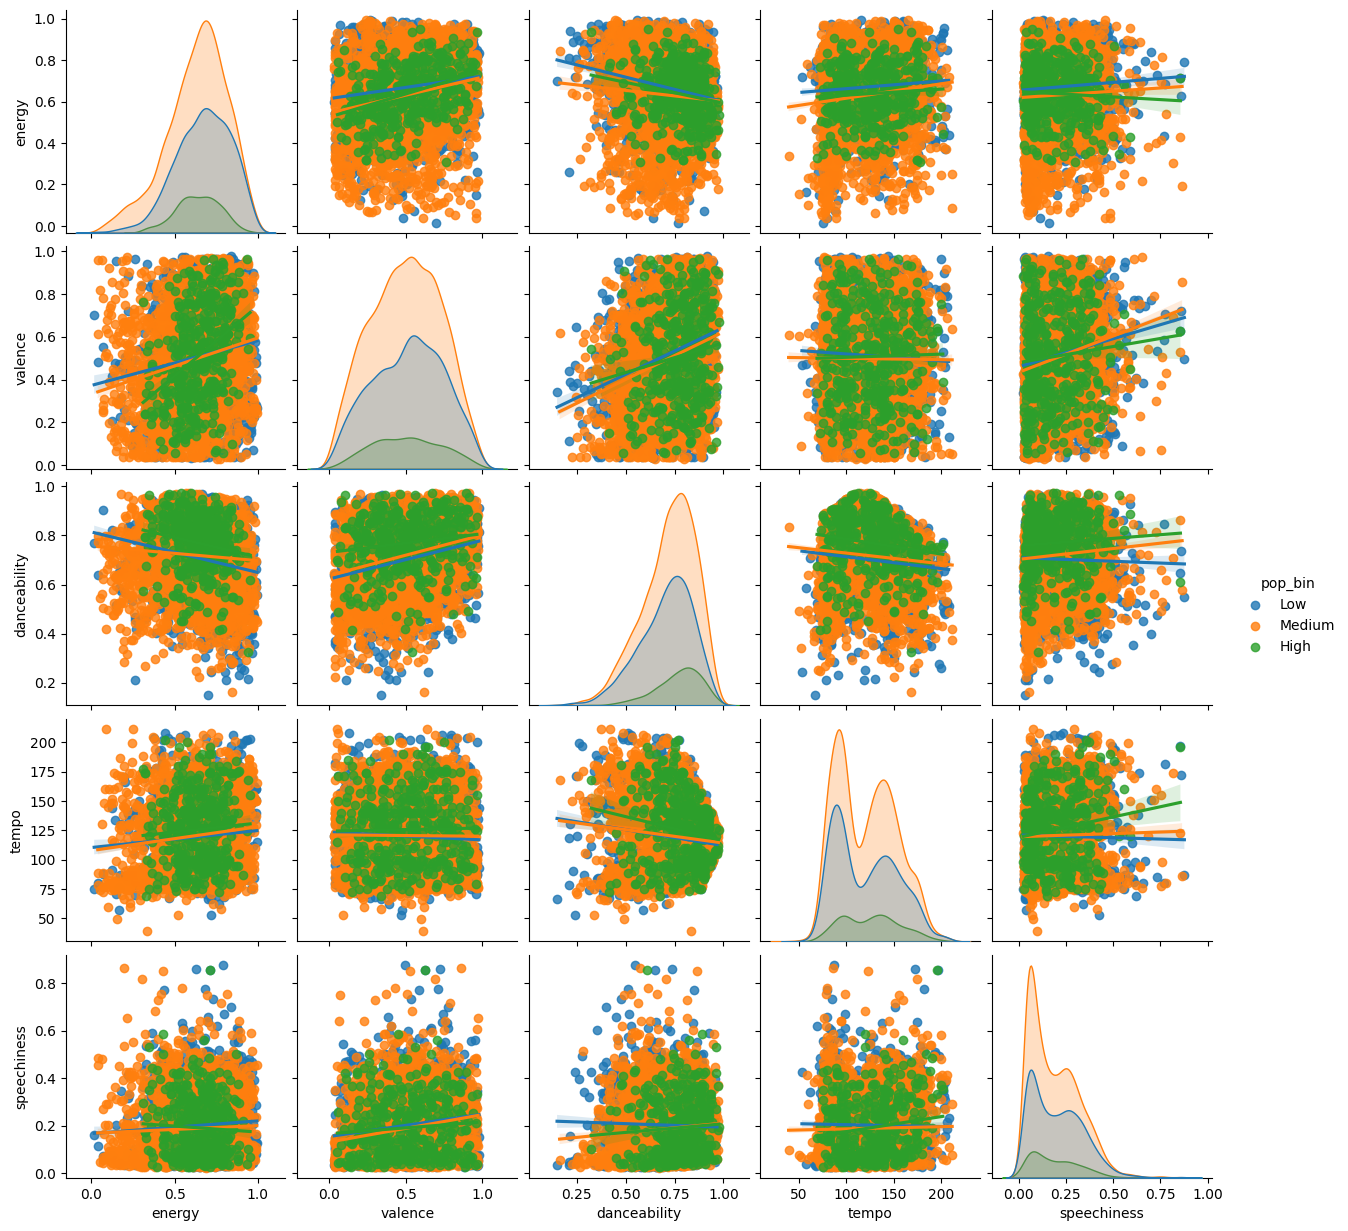

In [12]:
sns.pairplot(df[(df["playlist_genre"] == "rap")], 
             vars=["energy", "valence", "danceability", "tempo", "speechiness"],
             hue="pop_bin",
             kind='reg')


Only small relation between lower energy and higher danceability

Sweetspots:
- 0.4 to 0.8 energy
- 0.6 to 1.0 danceability

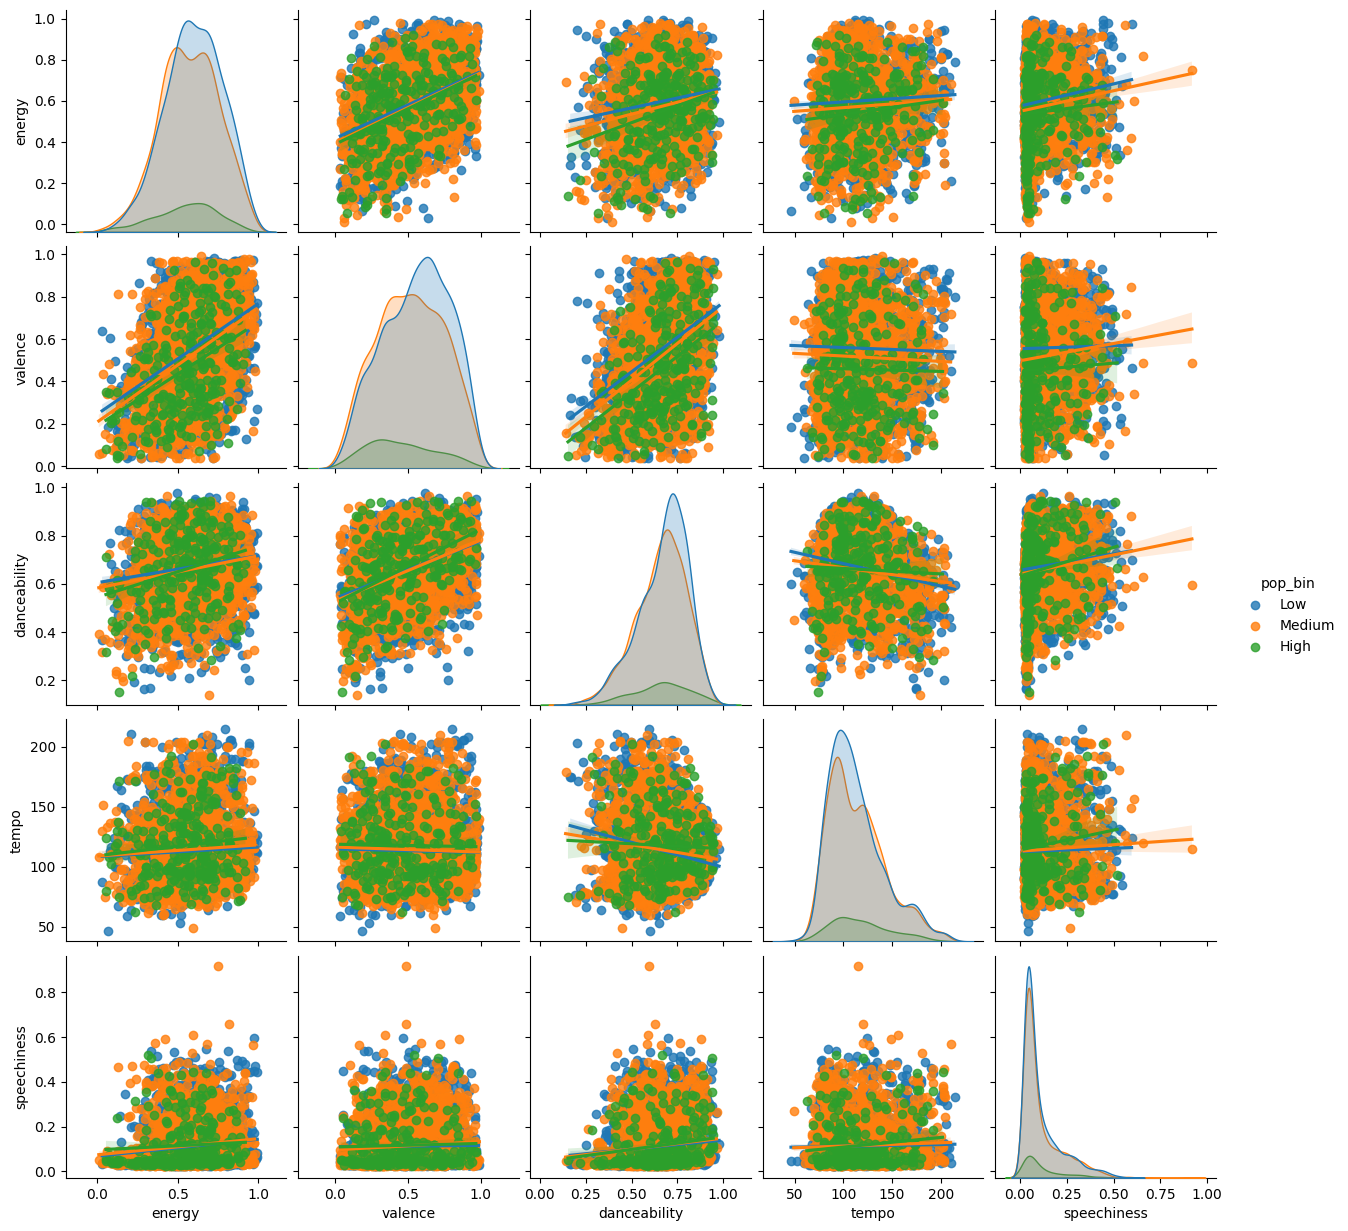

In [13]:
sns.pairplot(df[(df["playlist_genre"] == "r&b")], 
             vars=["energy", "valence", "danceability", "tempo", "speechiness"],
             hue="pop_bin",
             kind='reg')

R&B songs with lower valence are more popular

Low valence generally means lower energy in R&B songs

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

X = df[df['playlist_genre']=='rap'][["energy", "valence", "danceability", "tempo", "speechiness"]]
y = df[df['playlist_genre']=='rap']["track_popularity"]

X_scaled = StandardScaler().fit_transform(X)

rf = RandomForestRegressor()
rf.fit(X_scaled, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False))
print(rf.score(X_scaled, y))

tempo           0.215950
energy          0.199867
danceability    0.195634
valence         0.195314
speechiness     0.193235
dtype: float64
0.8389580676947903


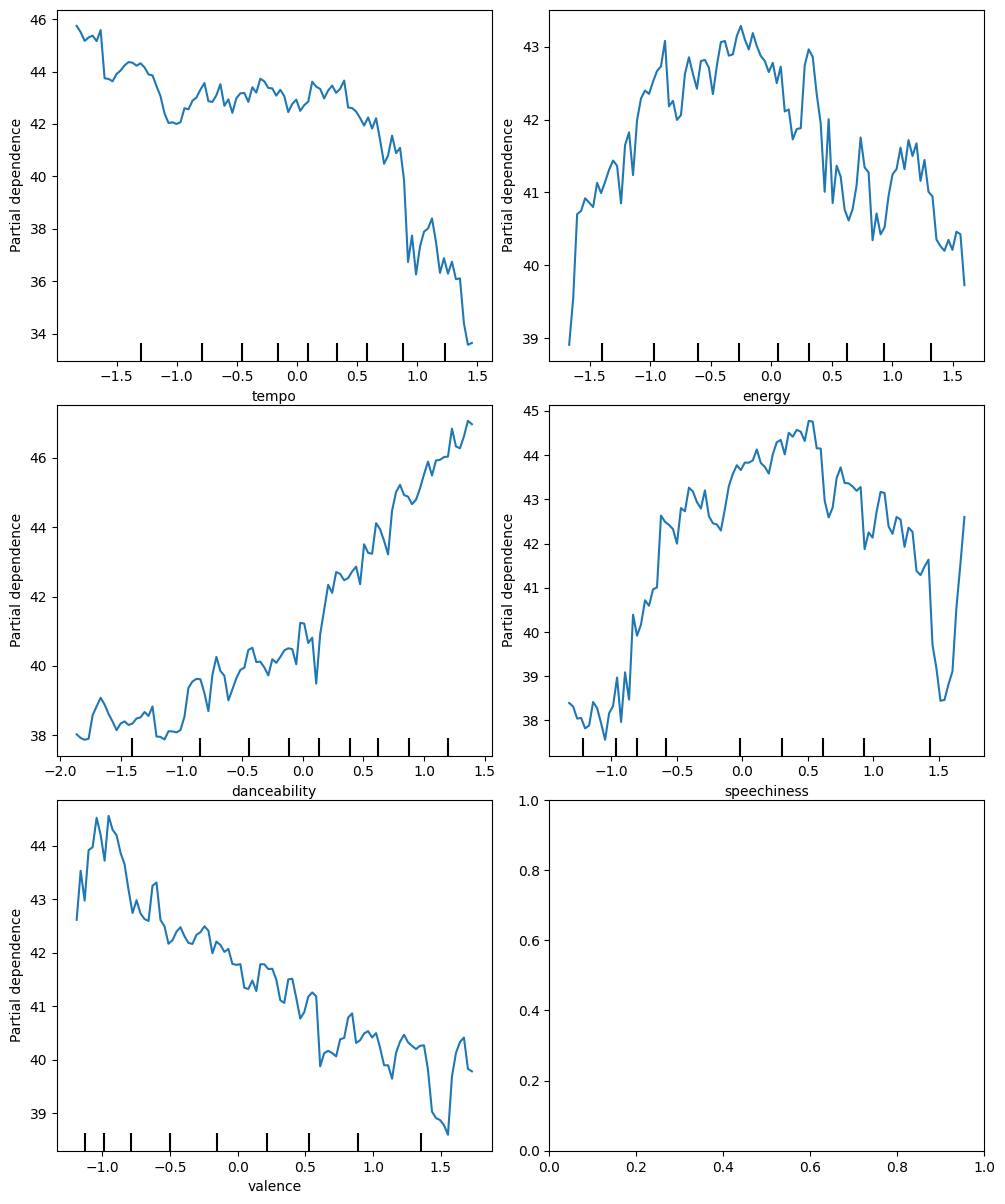

In [54]:
from sklearn.inspection import partial_dependence, PartialDependenceDisplay

f, ax = plt.subplots(3, 2, figsize=(10, 12))

f.tight_layout()
features = ["tempo", "energy", "danceability", "speechiness", "valence"]

for i in range(len(features)):
    PartialDependenceDisplay.from_estimator(rf, X_scaled, [(i)], feature_names=features, ax=ax.flat[i])

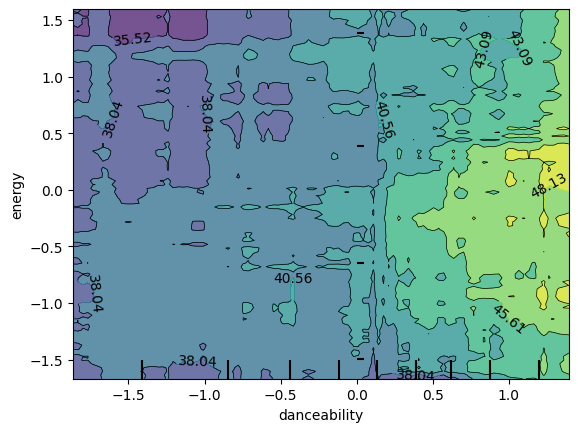

In [42]:
PartialDependenceDisplay.from_estimator(rf, X_scaled, [(2, 1)], feature_names=features)

In [55]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_scaled)


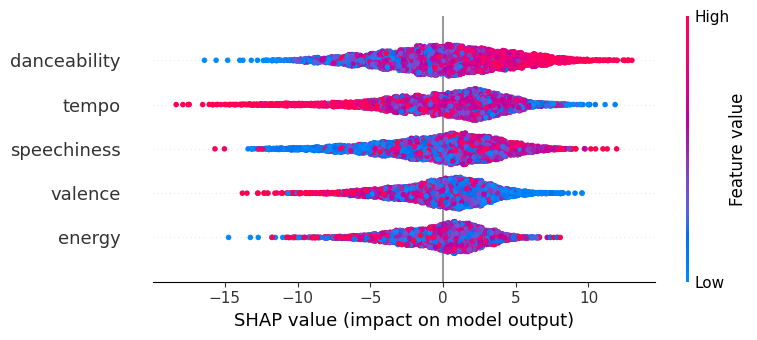

In [56]:
shap.summary_plot(shap_values, X_scaled, feature_names=features)

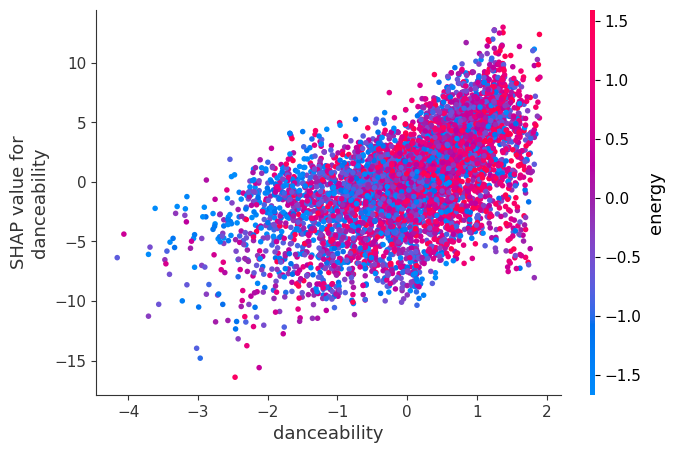

In [57]:
shap.dependence_plot("danceability", shap_values, X_scaled, feature_names=features)

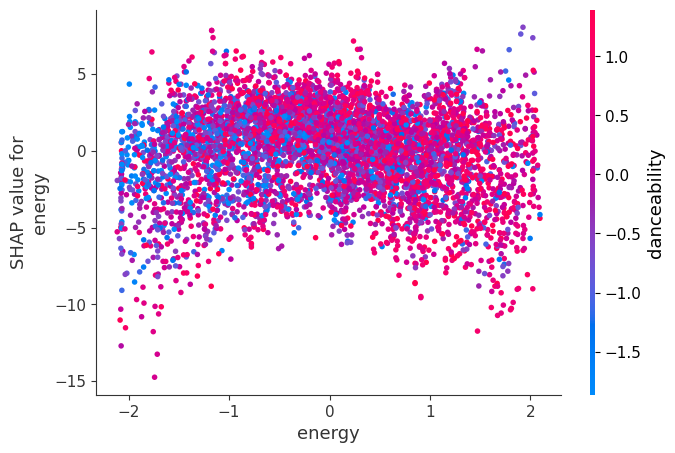

In [59]:
shap.dependence_plot("energy", shap_values, X_scaled, feature_names=features)